The enitre reason for this exercise of checking for the model of targets based on given data using machine learning and to understand the simple trends behind the stock process of Bitcoin using Logisitc Regression. 

In [3]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

#Import warnings is a module that has warnings of all deprecation warning category
import warnings
warnings.filterwarnings('ignore')

In [13]:
import yfinance as yf

# Retrieve Bitcoin data
bitcoin = yf.Ticker("BTC-USD")

df = yf.download('BTC-USD')

# Get historical market data
btc_history = bitcoin.history(period="max")

[*********************100%***********************]  1 of 1 completed


In [15]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2024-12-22,95104.937500,95104.937500,97360.265625,94202.187500,97218.320312,43147981314
2024-12-23,94686.242188,94686.242188,96416.210938,92403.132812,95099.390625,65239002919


In [19]:
df.shape

(3754, 6)

In [23]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3.754000e+03
mean,19486.895689,19486.895689,19902.152295,19005.287946,19462.944855,1.855298e+10
std,21974.285425,21974.285425,22428.952895,21443.997704,21943.747322,2.033506e+10
min,178.102997,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,1222.760010,1222.760010,1238.225006,1205.912476,1222.839966,4.067910e+08
50%,9343.446289,9343.446289,9520.123047,9200.650391,9345.520508,1.460272e+10
75%,30479.509277,30479.509277,31256.070312,29980.642578,30470.837402,2.964100e+10
max,106140.601562,106140.601562,108268.445312,105291.734375,106147.296875,3.509679e+11


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3754 entries, 2014-09-17 to 2024-12-26
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  3754 non-null   float64
 1   (Close, BTC-USD)      3754 non-null   float64
 2   (High, BTC-USD)       3754 non-null   float64
 3   (Low, BTC-USD)        3754 non-null   float64
 4   (Open, BTC-USD)       3754 non-null   float64
 5   (Volume, BTC-USD)     3754 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 205.3 KB


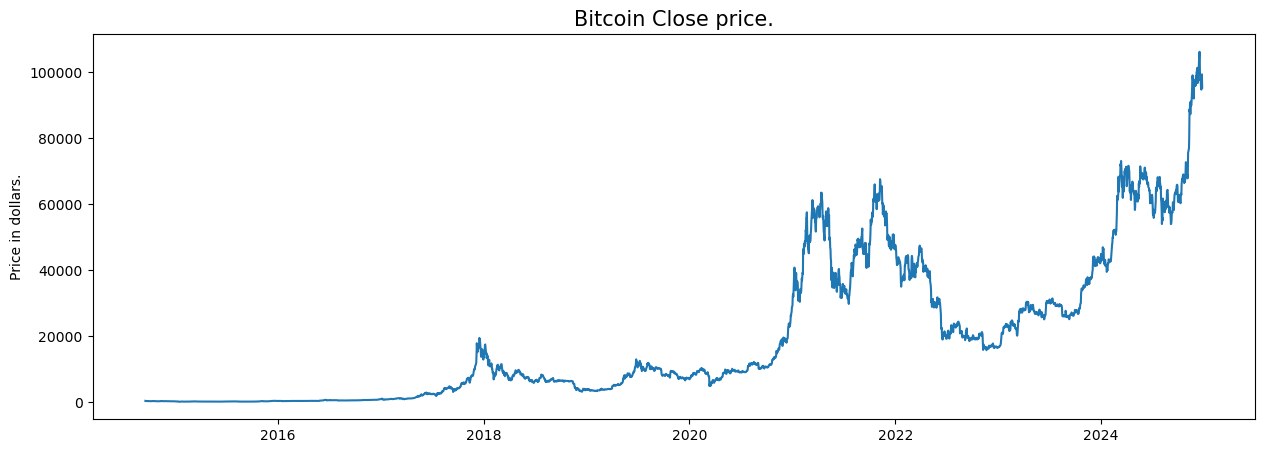

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [29]:
#If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not
df[df['Close'] == df['Adj Close']].shape

(3754, 6)

In [31]:
df.isnull().sum()
#Checking for the Null data 

Price      Ticker 
Adj Close  BTC-USD    0
Close      BTC-USD    0
High       BTC-USD    0
Low        BTC-USD    0
Open       BTC-USD    0
Volume     BTC-USD    0
dtype: int64

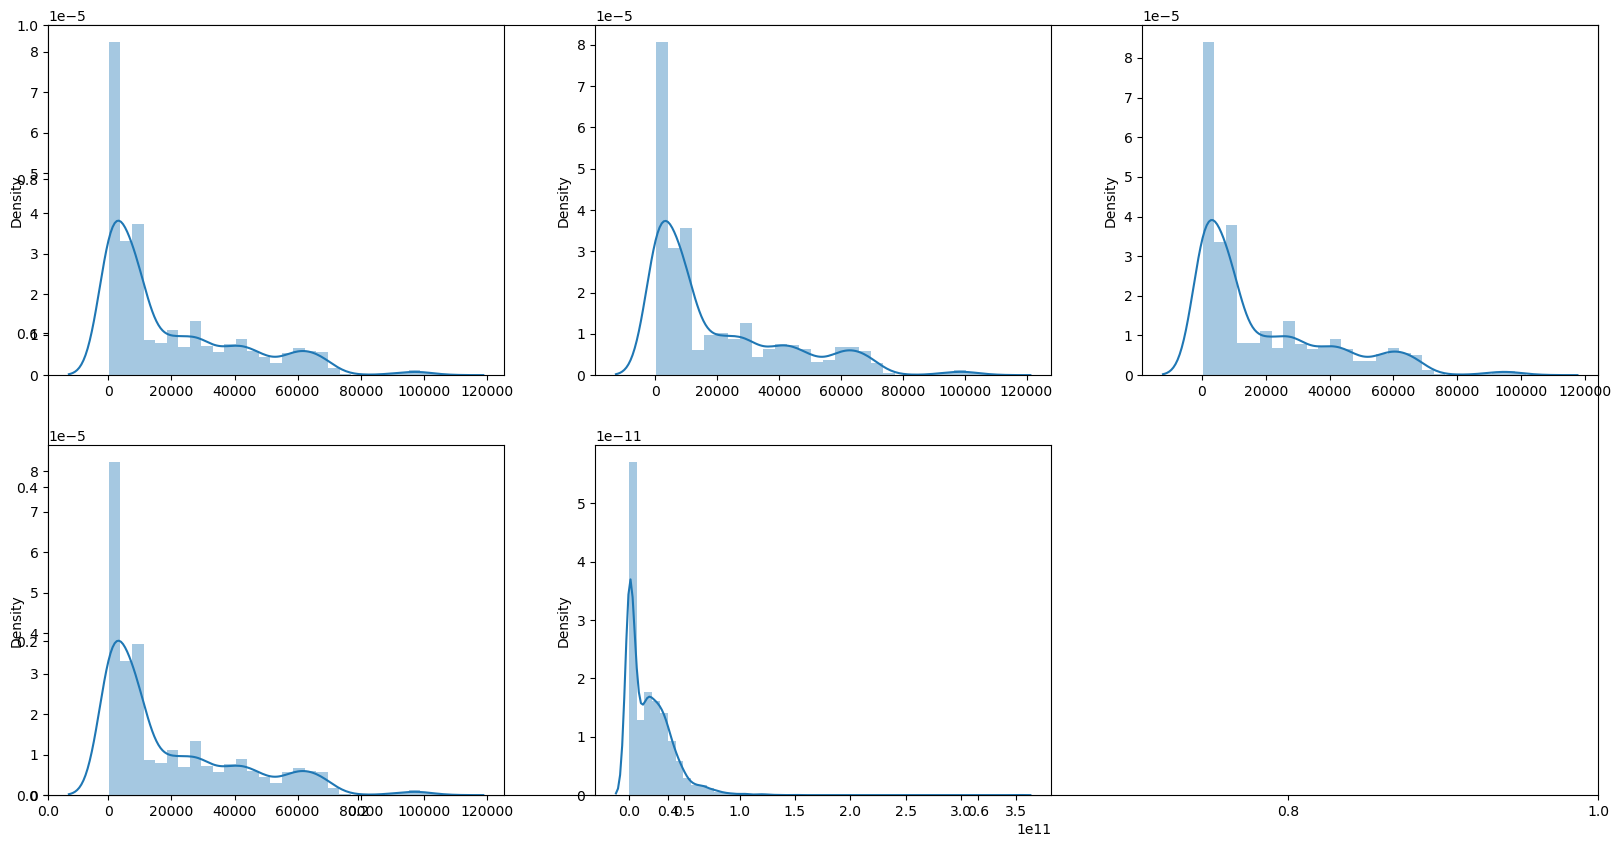

In [33]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

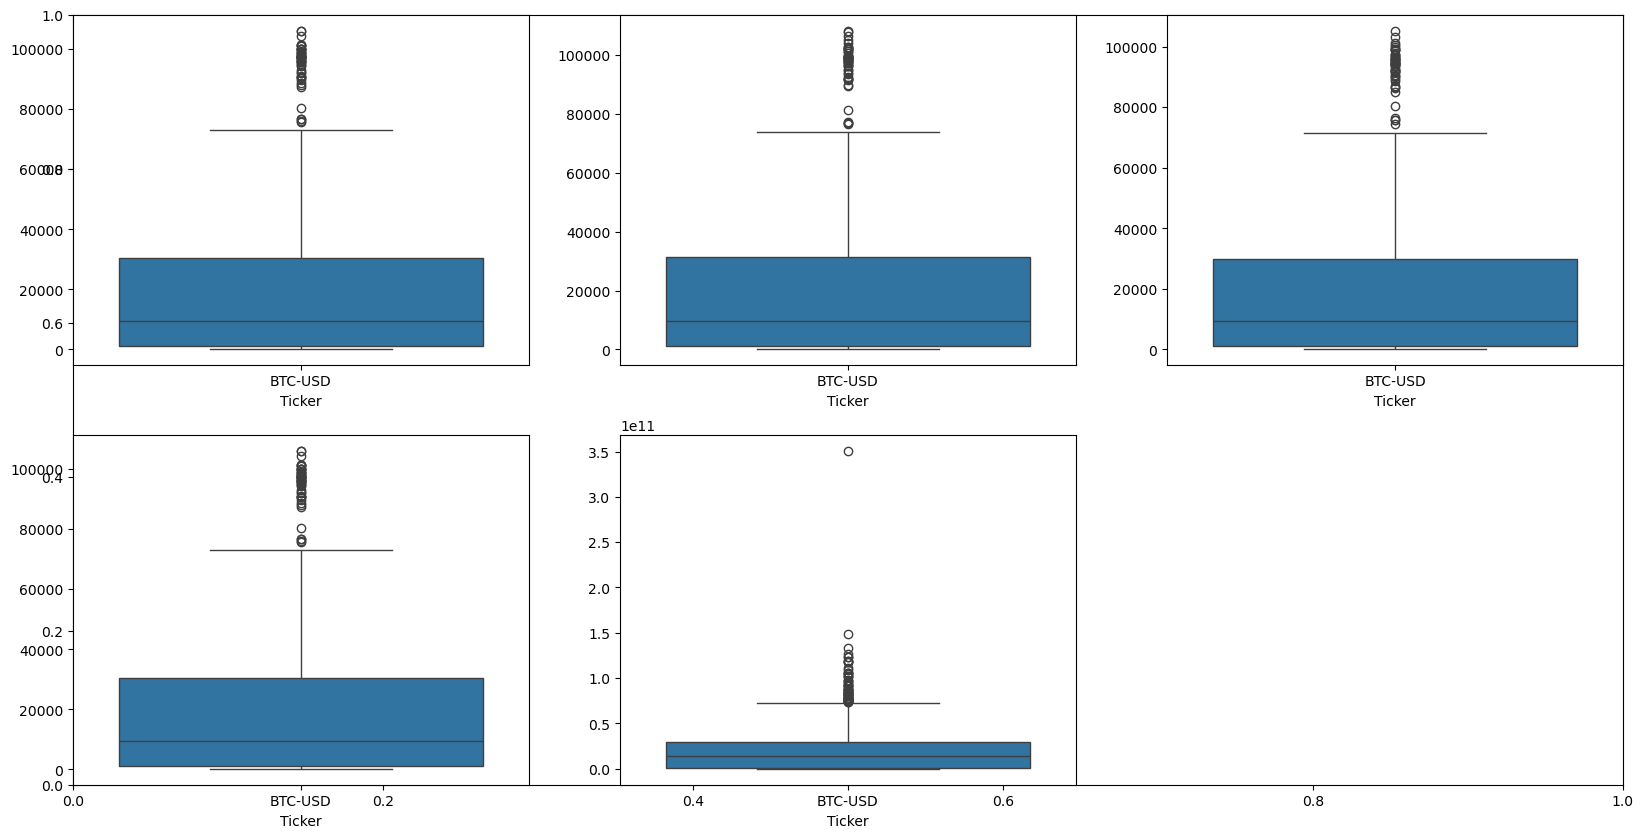

In [35]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [41]:
df = df.reset_index()

In [43]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...,...
3749,2024-12-22,95104.937500,95104.937500,97360.265625,94202.187500,97218.320312,43147981314
3750,2024-12-23,94686.242188,94686.242188,96416.210938,92403.132812,95099.390625,65239002919
3751,2024-12-24,98676.093750,98676.093750,99404.062500,93448.015625,94684.343750,47114953674


In [57]:
df['year'] = df['Date'].dt.year

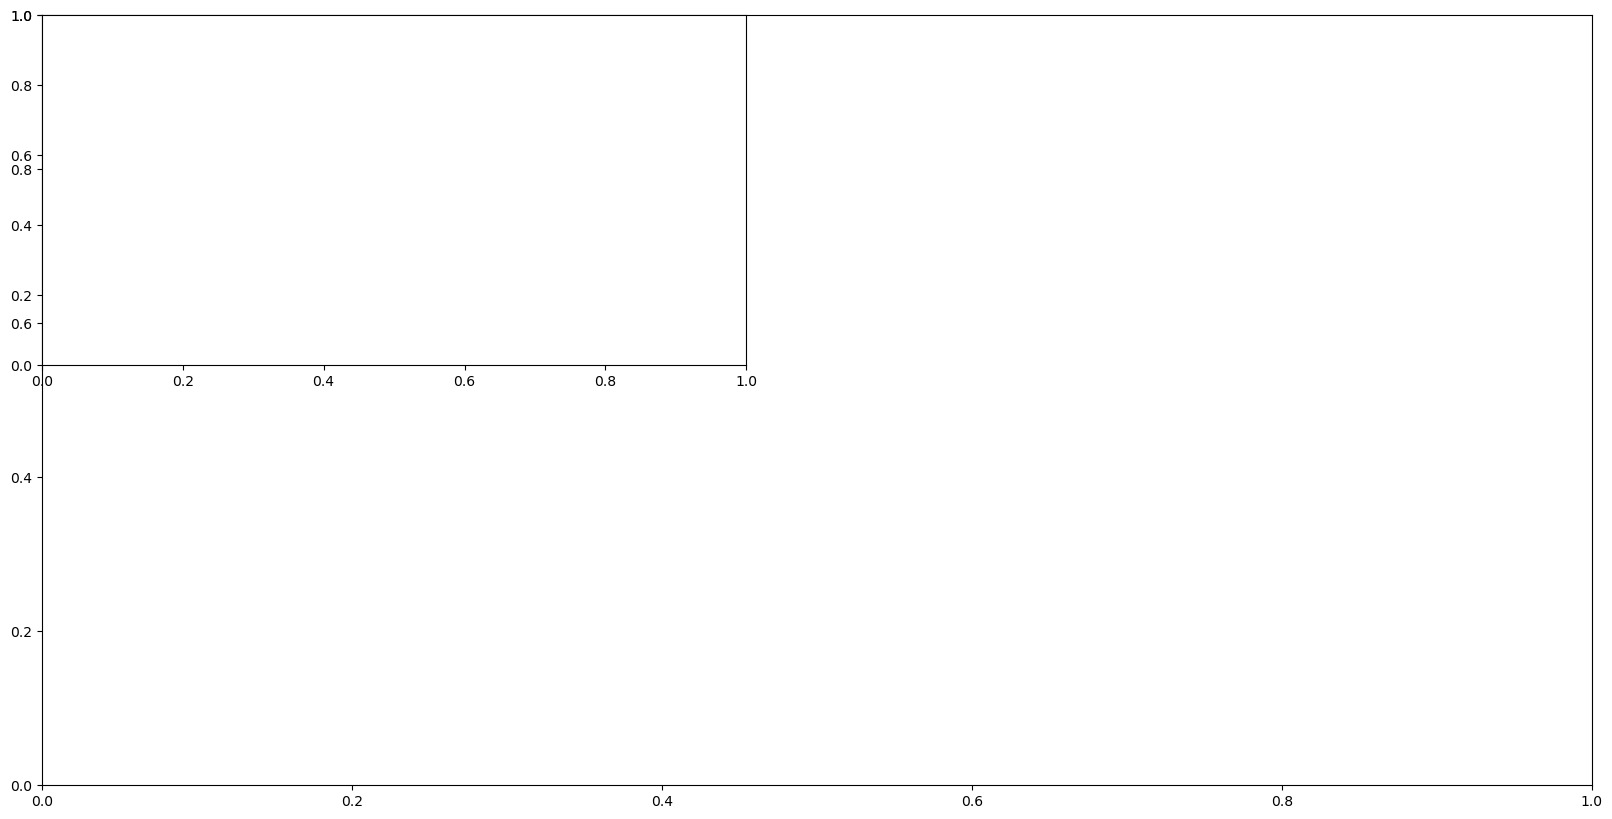

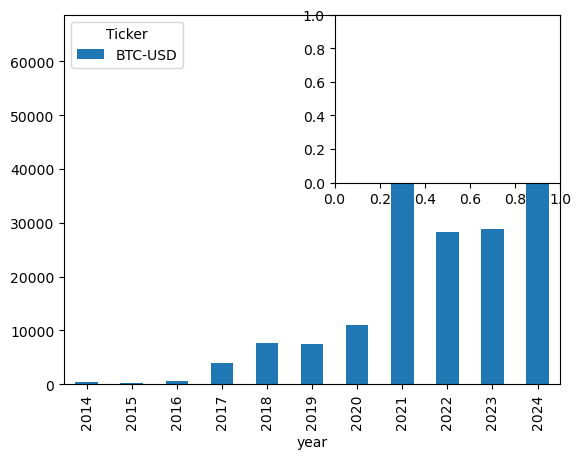

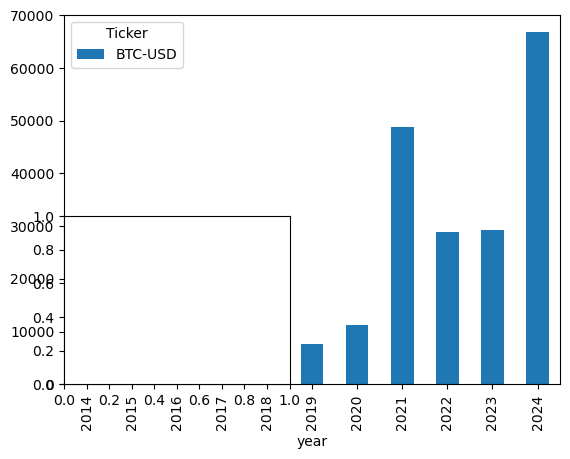

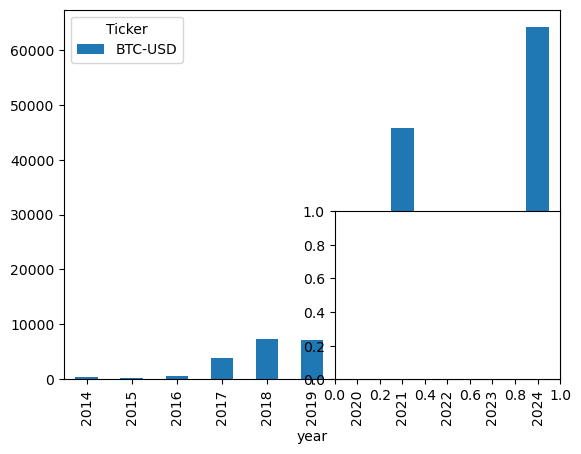

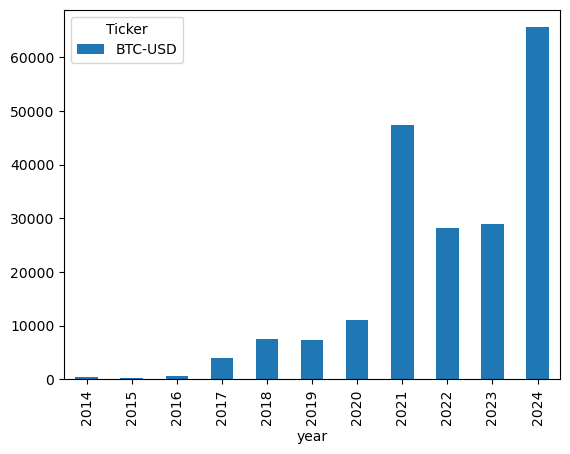

In [59]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [61]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

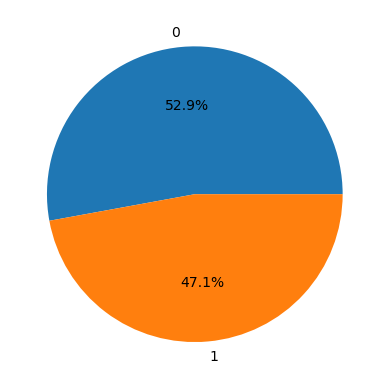

In [63]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

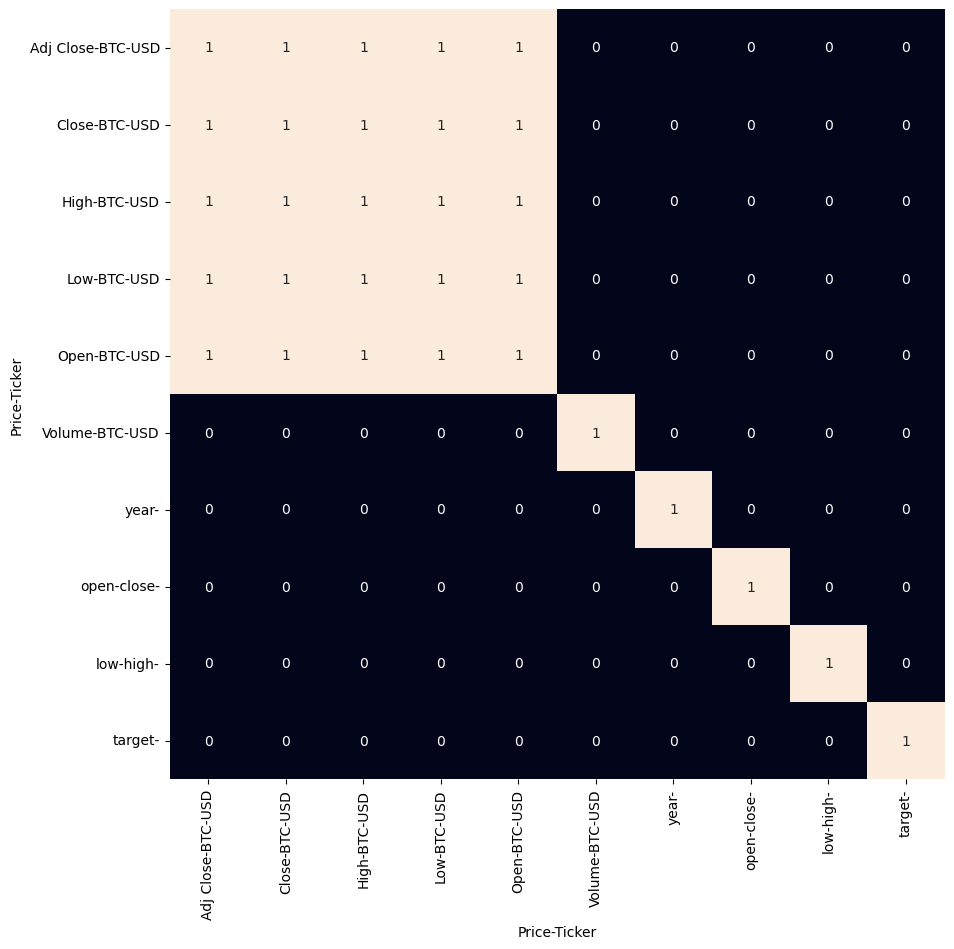

In [65]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()